In [1]:
# Classification by Neural Networks
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data with two classes
np.random.seed(0)
X = np.random.randn(200, 2)  # 200 data points with 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Create labels based on a simple rule


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 0s 9ms/step - loss: 0.7377 - accuracy: 0.3333 - val_loss: 0.6416 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.3542 - val_loss: 0.6269 - val_accuracy: 0.5625
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.3611 - val_loss: 0.6127 - val_accuracy: 0.5625
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.3681 - val_loss: 0.5982 - val_accuracy: 0.5625
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.4028 - val_loss: 0.5845 - val_accuracy: 0.5625
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5000 - val_loss: 0.5710 - val_accuracy: 0.5625
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.5486 - val_loss: 0.5584 - val_accuracy: 0.5625
Epoch 8/50
9/9 [==================

In [9]:
'''for first data
Epoch 1/50
9/9 [[==============================] - 0s 9ms/step - loss: 0.7377 - accuracy: 
        0.3333 - val_loss: 0.6416 - val_accuracy: 0.5000]

Epoch
1/50: This indicates that the training is in the first epoch out of a total
of 50 epochs. An epoch is one complete pass through the entire training dataset.

9/9:
This part shows the progress within the current epoch. The first number (9) represents 
the number of batches processed in the current epoch, and the second number (9) is the 
total number of batches in the training dataset. In this case, it indicates that all batches 
in the training dataset have been processed in this epoch.

[==============================]: 
This is a visual representation of the progress bar, showing that the training is advancing.
- 0s 9ms/step: This part provides timing information. It indicates that each step (batch) of 
training took 9 milliseconds.

loss:
0.7377: This is the training loss at the end of the current epoch. It measures how well the 
neural network is fitting the training data. In this case, the training loss is 0.7377.

accuracy:
0.3333: This is the training accuracy at the end of the current epoch. It represents the 
fraction of correctly classified training examples. In this case, the training accuracy 
is 0.3333, which corresponds to 33.33%.

val_loss: 
0.6416: This is the validation (or test) loss at the end of the current epoch. 
It measures how well the neural network is generalizing to new, unseen data. In this case, 
the validation loss is 0.6416.

val_accuracy: 
0.5000: This is the validation (or test) accuracy at the end of the current 
epoch. It represents the fraction of correctly classified validation examples. In this 
case, the validation accuracy is 0.5000, which corresponds to 50.00%. 

The output is typically printed after each epoch to provide insights into the training 
progress and the model's performance. As training continues, you would ideally want to 
see the training loss decrease, while the validation loss and accuracy remain stable or 
improve, indicating that the model is learning and generalizing effectively.'''

"for first data\nEpoch 1/50\n9/9 [[==============================] - 0s 9ms/step - loss: 0.7377 - accuracy: \n        0.3333 - val_loss: 0.6416 - val_accuracy: 0.5000]\n\nEpoch\n1/50: This indicates that the training is in the first epoch out of a total\nof 50 epochs. An epoch is one complete pass through the entire training dataset.\n\n9/9:\nThis part shows the progress within the current epoch. The first number (9) represents \nthe number of batches processed in the current epoch, and the second number (9) is the \ntotal number of batches in the training dataset. In this case, it indicates that all batches \nin the training dataset have been processed in this epoch.\n\n[==============================]: \nThis is a visual representation of the progress bar, showing that the training is advancing.\n- 0s 9ms/step: This part provides timing information. It indicates that each step (batch) of \ntraining took 9 milliseconds.\n\nloss:\n0.7377: This is the training loss at the end of the cur

In [7]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.9750
Test Loss: 0.26678267121315
Test Accuracy: 0.9750000238418579


15488/15488 [==============================] - 3s 207us/step


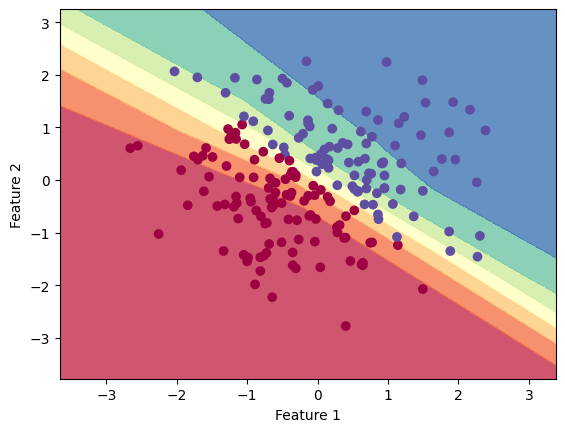

In [8]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()